In [1]:
!pip install tensorflow==2.12.0

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.12.0


In [4]:
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
# dividing in independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
# Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
# concatenate these in dataset
X = X.drop(['Geography','Gender'],axis=1)

In [12]:
X = pd.concat([X,geography,gender],axis=1)
X['Germany'] = X['Germany'].astype(int)
X['Spain'] = X['Spain'].astype(int)
X['Male'] = X['Male'].astype(int)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# splitting data in train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train.shape

(8000, 11)

In [18]:
## Part 2
## Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [47]:
## initialise ann
classifer=Sequential()

In [48]:
#adding i/p layer
classifer.add(Dense(units=11,activation='relu'))

In [49]:
#adding 1st hidden layer
classifer.add(Dense(units=7,activation='relu'))
classifer.add(Dropout(0.2));

In [50]:
#adding 2nd hidden layer
classifer.add(Dense(units=6,activation='relu'))

In [51]:
#adding o/p layer
classifer.add(Dense(units=1,activation='sigmoid'))

In [52]:
classifer.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [53]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [54]:
model_history=classifer.fit(X_train,y_train,
                            validation_split=0.33,
                            batch_size=10,epochs=100,
                            callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7746 - val_loss: 0.4585 - val_accuracy: 0.7921
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8132 - val_loss: 0.4180 - val_accuracy: 0.8254
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8350 - val_loss: 0.4005 - val_accuracy: 0.8326
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8384 - val_loss: 0.3884 - val_accuracy: 0.8353
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3749 - accuracy: 0.8461 - val_loss: 0.3798 - val_accuracy: 0.8391
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8427 - val_loss: 0.3771 - val_accuracy: 0.8383
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8449 - val_loss: 0.3725 - val_accuracy: 0.8395

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

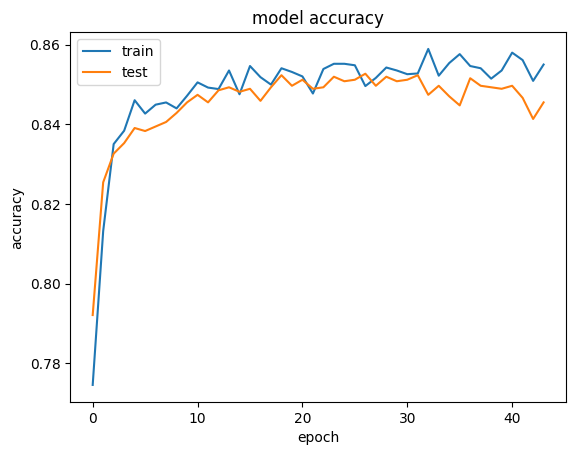

In [56]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

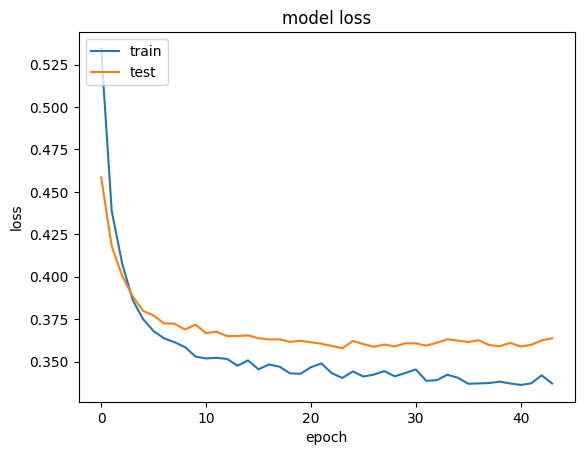

In [57]:
# plot summary for loss history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [58]:
# Part-3 Making predictions & evaluating model

y_pred=classifer.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [59]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[1524,   83],
       [ 215,  178]])

In [61]:
# Calculating accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [62]:
score

0.851

In [63]:
# Weights information
classifer.get_weights()

[array([[ 2.66200721e-01, -1.50397634e-02,  3.87885362e-01,
          3.73758465e-01, -3.29367742e-02,  6.27489239e-02,
         -1.10089503e-01, -5.17343059e-02, -1.73248097e-01,
          4.18339223e-02, -3.05045843e-01],
        [ 2.87483782e-01,  1.05901527e+00, -8.27205062e-01,
         -5.38885176e-01,  2.75607467e-01, -8.18138063e-01,
          3.40296984e-01,  1.87402740e-01,  3.48305821e-01,
          1.07841164e-01, -8.50884140e-01],
        [-5.32933697e-02,  2.81183682e-02, -1.19072393e-01,
         -2.59943344e-02,  6.46892488e-02, -3.46595049e-02,
          2.33358786e-01,  1.37352362e-01, -2.45087549e-01,
         -8.38400051e-02, -2.38817886e-01],
        [ 3.67698759e-01,  1.39996350e-01,  3.59720647e-01,
         -1.26740905e-02, -2.94532180e-01, -4.66042101e-01,
         -4.55854423e-02,  3.69297951e-01,  3.54506880e-01,
          4.67425078e-01,  1.86371803e-02],
        [ 5.52215353e-02, -1.53288886e-01, -2.29369953e-01,
         -6.04300797e-01, -1.12613952e+00,  